In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df = pd.read_csv('preprocessed(1).csv', index_col=0)

In [3]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date,DOW
206668,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,2022-02-11,4
206669,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,2022-02-11,4
206670,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,2022-02-11,4
206671,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,2022-02-11,4
206672,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,2022-02-11,4


In [4]:

X = df.drop('price', axis=1)
y = df['price']

# remove date column
X = X.drop('date', axis=1)

# one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [5]:
X.head()

,duration,days_left,DOW,airline_Other,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
206668,24.75,1,4,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
206669,26.50,1,4,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
206670,6.67,1,4,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
206671,2.17,1,4,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
206672,17.75,1,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# fit a simple random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, verbose=100, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)
# get r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
building tree 18 of 100

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
building tree 19 of 100
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.0s
building tree 20 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
building tree 21 of 100
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
building tree 22 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
building tree 23 of 100
[Pa

In [7]:
# check mape
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape(y_test, y_pred)

6.37895598783315

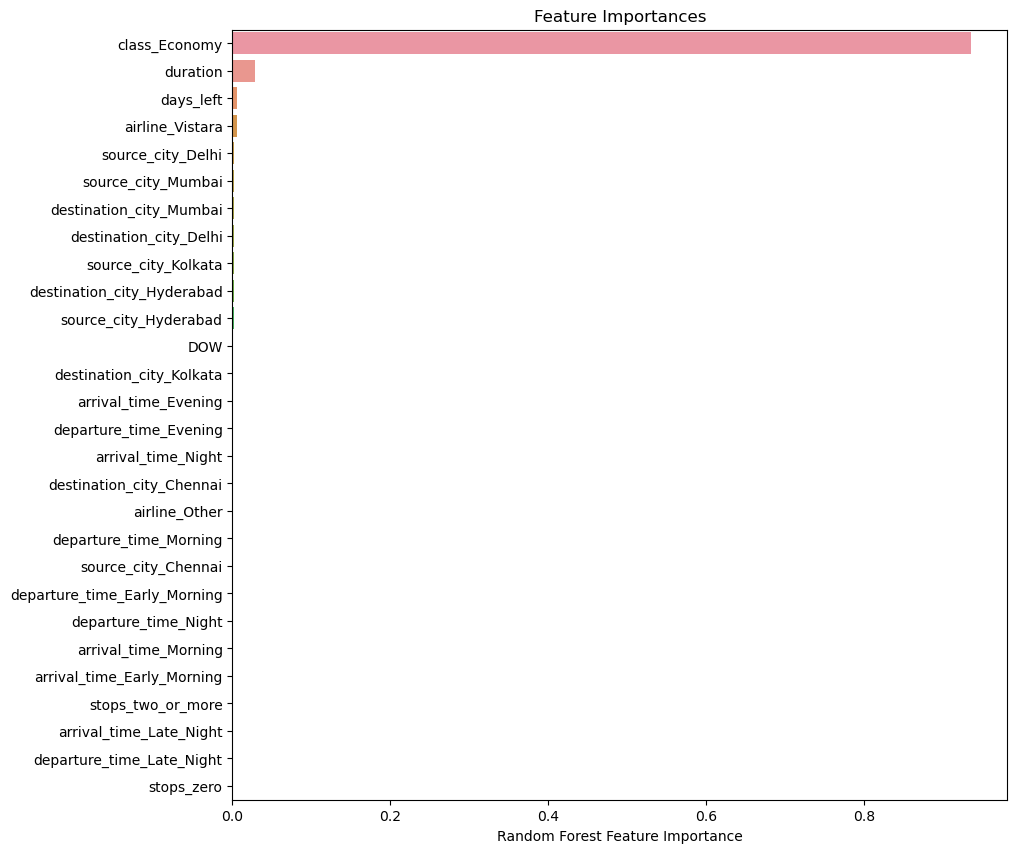

In [8]:
# plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
sns.barplot(x=importances[indices], y=features[indices])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [9]:
# select top 4 features
top_4 = features[indices][:4]
top_4

Index(['class_Economy', 'duration', 'days_left', 'airline_Vistara'], dtype='object')

In [10]:
# check datatypes
X.dtypes

duration                        float64
days_left                         int64
DOW                               int64
airline_Other                     uint8
airline_Vistara                   uint8
source_city_Chennai               uint8
source_city_Delhi                 uint8
source_city_Hyderabad             uint8
source_city_Kolkata               uint8
source_city_Mumbai                uint8
departure_time_Early_Morning      uint8
departure_time_Evening            uint8
departure_time_Late_Night         uint8
departure_time_Morning            uint8
departure_time_Night              uint8
stops_two_or_more                 uint8
stops_zero                        uint8
arrival_time_Early_Morning        uint8
arrival_time_Evening              uint8
arrival_time_Late_Night           uint8
arrival_time_Morning              uint8
arrival_time_Night                uint8
destination_city_Chennai          uint8
destination_city_Delhi            uint8
destination_city_Hyderabad        uint8


PyALE._ALE_generic:INFO: Discrete feature detected.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done  15 tasks      | elaps

PyALE._ALE_generic:INFO: Continuous feature detected.


[Parallel(n_jobs=16)]: Done  77 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  79 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  81 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  83 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  85 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  89 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  91 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  93 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  95 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  97 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend T

PyALE._ALE_generic:INFO: Discrete feature detected.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done  15 tasks      | elaps

PyALE._ALE_generic:INFO: Discrete feature detected.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  15 tasks      | elaps

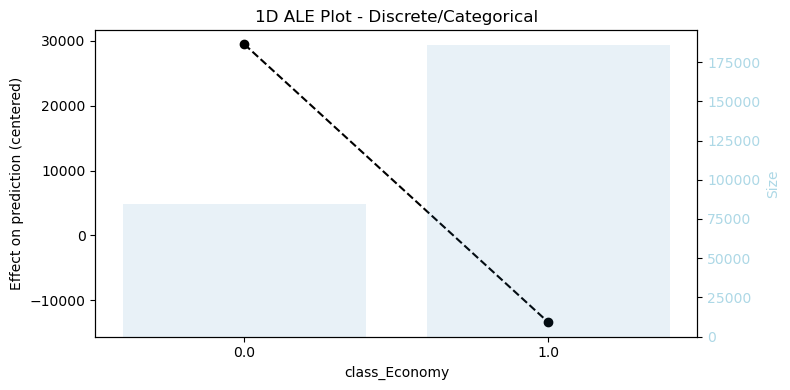

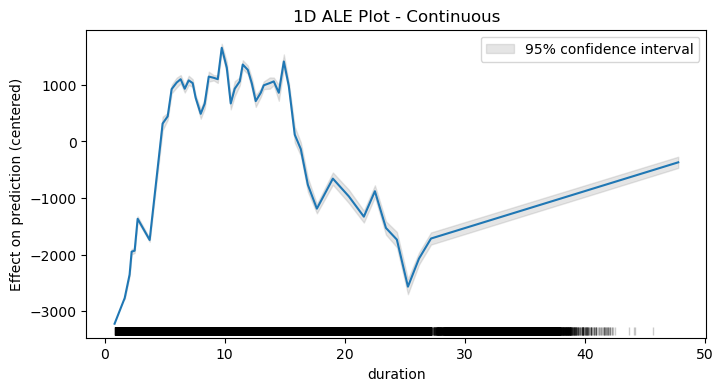

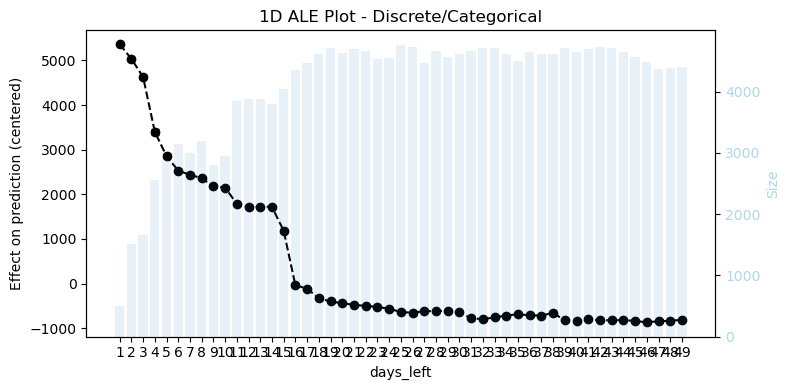

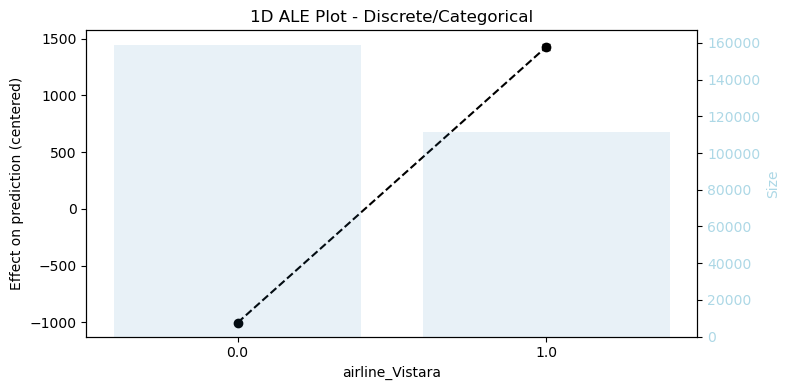

In [21]:
from PyALE import ale
import random
# plot ALE plot for top 4 features
## 2D - continuous - with 95% CI
random.seed(123)
X_sample = X.sample(200000, random_state=42)

ale_eff = ale(X=X[features], model=rf, feature=top_4[:1])
ale_eff = ale(
    X=X_sample, model=rf, feature=top_4[1:2], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_sample, model=rf, feature=top_4[2:3], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(X=X[features], model=rf, feature=top_4[3:4])